*italicized text*# Graph Data Analytics

In [27]:
!conda install networkx --yes
!conda install matplotlib-base --yes
!conda install numpy --yes

Channels:
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.

Channels:
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/ac1f8293-8d9a-4f1f-9500-36198ca29f92/.conda/envs/myenv

  added / updated specs:
    - matplotlib-base


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h5eee18b_8          18 KB
    brotli-bin-1.0.9           |       h5eee18b_8          19 KB
    contourpy-1.2.0            |  py312hdb19cb5_0         238 KB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    fonttools-4.51.0           |  py312h5eee18b_0         2.9 MB
    freetype-2.12.1            |       h4a9f257_0         626 KB
    jpeg-9e                    |       h5eee18b_1         262 KB
    kiwisolver-1.4.4           |  py312h6a678d5_0          68 KB


In [31]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
G = nx.karate_club_graph()
print(G)

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges


### Calculate page rank by using simple degree centrality

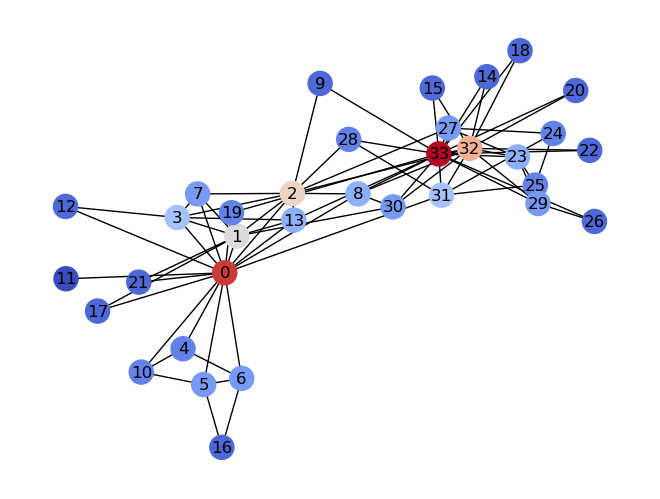

In [33]:
def simple_pagerank(G):
    p = np.array([G.degree(index) for node, index in enumerate(G.nodes())])
    return p

values = simple_pagerank(G)
nx.draw(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

### Calculate page rank by updating the centrality of each node with the iteration

(34,)


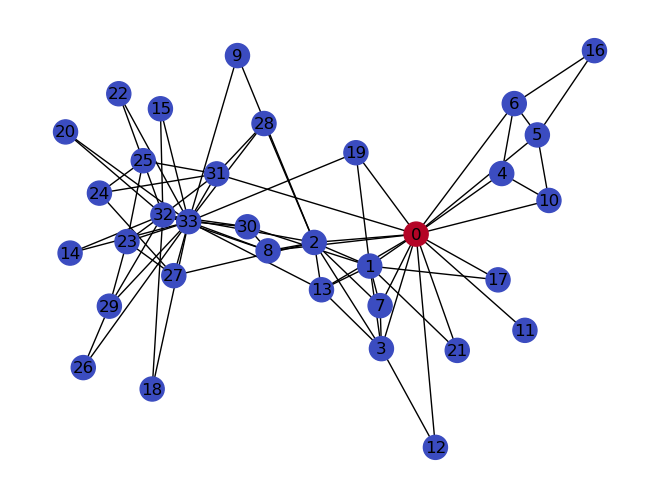

In [35]:
def pagerank_centrality(G, iter=100):
    p = np.array([1 for i in list(G.nodes())])
    print(p.shape)
    for k in range(iter):
        for i in G.nodes():
            for j in G.nodes():
                # update the centrality
                try:
                    p[i] += int(G.number_of_edges(i, j) * p[j] / G.degree[j])
                except:
                    pass
        
        norm = sum(p)
        p = p / norm        
    return p


values = pagerank_centrality(G)
nx.draw(G, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

In [45]:
G = nx.read_edgelist("gr0.California.edges.txt")
G.remove_nodes_from(list(nx.isolates(G)))
print(G)
G1 = G.subgraph(list(G.nodes())[100:150])
print(G1)

Graph with 6175 nodes and 15969 edges
Graph with 50 nodes and 42 edges


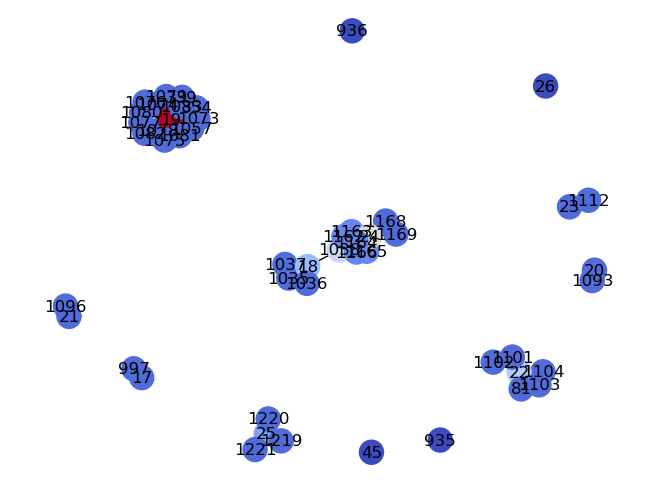

In [47]:
values = simple_pagerank(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)

(50,)


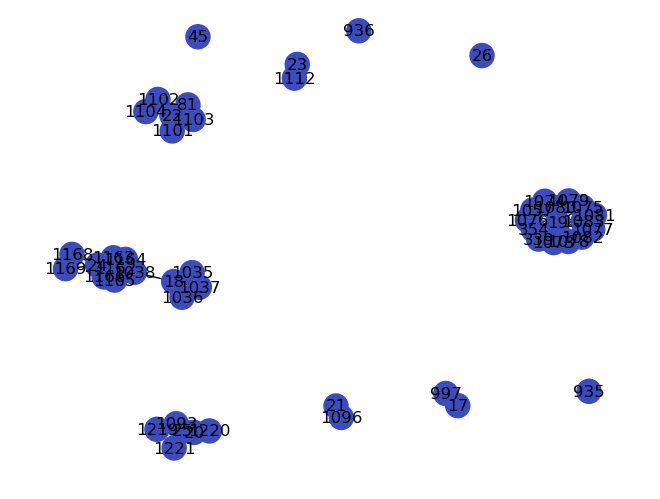

In [49]:
values = pagerank_centrality(G1)
nx.draw(G1, cmap=plt.get_cmap('coolwarm'), node_color = values, with_labels=True)